In [102]:
import pandas as pd
# Read the entire file into a DataFrame
df = pd.read_csv("vdjdb.txt", delimiter='\t')  # Assuming the file is tab-delimited, adjust if needed
# Display the DataFrame
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [103]:
def remove_coloumn(df):
    df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
           'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
           'antigen.species','vdjdb.score', 'meta']]
    return df

In [104]:
df['species'].unique()

array(['HomoSapiens', 'MusMusculus', 'MacacaMulatta'], dtype=object)

In [105]:
pd.set_option('display.max_colwidth', None)
df[['meta']].head(3)

,meta
0,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:01;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*08:03:2,HLA-DRB*15:01:1"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""065"", ""tissue"": ""PBMC""}"


In [106]:
pd.reset_option('display.max_colwidth')

filtered_df = df[df['complex.id'] == 4]
filtered_df.head(5)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...",2,sort,sanger,no,no
8,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2,sort,sanger,no,no


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   complex.id        92771 non-null  int64 
 1   gene              92771 non-null  object
 2   cdr3              92771 non-null  object
 3   v.segm            92670 non-null  object
 4   j.segm            91626 non-null  object
 5   species           92771 non-null  object
 6   mhc.a             92771 non-null  object
 7   mhc.b             92771 non-null  object
 8   mhc.class         92771 non-null  object
 9   antigen.epitope   92771 non-null  object
 10  antigen.gene      92709 non-null  object
 11  antigen.species   92771 non-null  object
 12  reference.id      91260 non-null  object
 13  method            92771 non-null  object
 14  meta              92771 non-null  object
 15  cdr3fix           92771 non-null  object
 16  vdjdb.score       92771 non-null  int64 
 17  web.method  

In [108]:
df.dtypes

complex.id           int64
gene                object
cdr3                object
v.segm              object
j.segm              object
species             object
mhc.a               object
mhc.b               object
mhc.class           object
antigen.epitope     object
antigen.gene        object
antigen.species     object
reference.id        object
method              object
meta                object
cdr3fix             object
vdjdb.score          int64
web.method          object
web.method.seq      object
web.cdr3fix.nc      object
web.cdr3fix.unmp    object
dtype: object

In [109]:
df.shape

(92771, 21)

In [110]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(120, 21)

In [111]:
df.count()

complex.id          92771
gene                92771
cdr3                92771
v.segm              92670
j.segm              91626
species             92771
mhc.a               92771
mhc.b               92771
mhc.class           92771
antigen.epitope     92771
antigen.gene        92709
antigen.species     92771
reference.id        91260
method              92771
meta                92771
cdr3fix             92771
vdjdb.score         92771
web.method          92771
web.method.seq      92771
web.cdr3fix.nc      92771
web.cdr3fix.unmp    92771
dtype: int64

### Dropping duplicate columns

In [112]:
# Drop duplicate rows
df=df.drop_duplicates()
df.shape

(92651, 21)

### Dropping missing and null value

In [113]:
print(df.isnull().sum())

complex.id             0
gene                   0
cdr3                   0
v.segm               101
j.segm              1144
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1511
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64


In [114]:
df=df.dropna()
df.shape

(89952, 21)

**After dropping null value**
* Bulleted

In [115]:
print(df.isnull().sum())

complex.id          0
gene                0
cdr3                0
v.segm              0
j.segm              0
species             0
mhc.a               0
mhc.b               0
mhc.class           0
antigen.epitope     0
antigen.gene        0
antigen.species     0
reference.id        0
method              0
meta                0
cdr3fix             0
vdjdb.score         0
web.method          0
web.method.seq      0
web.cdr3fix.nc      0
web.cdr3fix.unmp    0
dtype: int64


<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>


<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

>**## Exploring the data ##**

In [116]:
# Specify the substring to search for
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
substring = 'CD8+'

# Use boolean indexing to filter rows containing the substring in 'Description'
filtered_df = df[df['meta'].str.contains(substring, case=False, na=False)]

filtered_df[filtered_df['mhc.class']=='MHCII'].head(3)



,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
5309,0,TRB,CASSKLASTAGEQYF,TRBV2*01,TRBJ2-7*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*11:01,MHCII,DRFYKTLRAEQASQEV,...,HIV-1,PMID:27760342,"{""frequency"": ""70/70"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSKLASTAGEQYF"", ""cdr3_old"": ""CASSK...",1,sort,singlecell,no,no
5310,0,TRB,CASSGGQETQYF,TRBV14*01,TRBJ2-5*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,LNKIVRMYSPTSILD,...,HIV-1,PMID:27760342,"{""frequency"": ""76/76"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSGGQETQYF"", ""cdr3_old"": ""CASSGGQE...",1,sort,singlecell,no,no
5311,0,TRB,CASSWDSNYGYTF,TRBV5-5*01,TRBJ1-2*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,DRFYKTLRAEQASQEV,...,HIV-1,PMID:27760342,"{""frequency"": ""23/23"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSWDSNYGYTF"", ""cdr3_old"": ""CASSWDS...",1,sort,singlecell,no,no


In [117]:
# remove all the data with 0 complex.id
df = df[df['complex.id'] != 0]

In [118]:
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0,sort,singlecell,no,no
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2,sort,singlecell,no,no
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGGSGGYNKLIF"", ""cdr3_old"": ""CLVGGS...",0,sort,singlecell,no,no


# Select data with vdjscore range from 1-3

In [119]:
def vdjscore(df):
    df = df[df['vdjdb.score'] != 0]
    return df

df=vdjscore(df)
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92686,30552,TRB,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,FPQPEQPFPWQP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSQGSGGNEQFF"", ""cdr3_old"": ""CASSQG...",2,sort,singlecell,no,no
92689,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,QLQPFPQPELPY,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAASVLYGSSNTGKLIF"", ""cdr3_old"": ""CAA...",2,sort,singlecell,no,no
92690,30554,TRB,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,QLQPFPQPELPY,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSIVGSGGYNEQFF"", ""cdr3_old"": ""CASS...",2,sort,singlecell,no,no
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no


## Dropping null values

In [120]:
def drop_null(df):
    df.dropna()
    return df

In [121]:
df=drop_null(df)

## Dropping duplicates

In [122]:
df=df.drop_duplicates()
df.shape

(5623, 21)

##  TCRDist3

In [123]:
# df_dash = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")

In [124]:
# df_dash.head(3)

## Installing tcrdist3 package ##

In [125]:
# pip install tcrdist3
# installing tcrdist3

In [126]:
# from tcrdist.repertoire import TCRrep
# tr = TCRrep(cell_df = df_dash, 
#             organism = 'mouse', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv')
# tr.pw_alpha
# # tr.pw_beta
# # tr.pw_cdr3_a_aa
# # tr.pw_cdr3_b_aa

In [127]:
# tr = TCRrep(cell_df = df_dash,
#             organism = 'mouse',
#             chains = ['alpha','beta'],
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)

# tr.cpus = 2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# tr.rw_beta
# # """<1920x1920 sparse matrix of type '<class 'numpy.int16'>'
# # with 108846 stored elements in Compressed Sparse Row format>
# # """
# # print(tr.rw_beta)    

In [128]:
# print(tr.rw_beta)    

## Preprocess vdjdb.text data frame for tcrdist3

In [129]:
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [130]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species','mhc.a', 'mhc.b','antigen.epitope', 'antigen.gene','antigen.species']]

In [131]:
df.head(3)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,antigen.epitope,antigen.gene,antigen.species
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,FLKEKGGL,Nef,HIV-1
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,FLKEKGGL,Nef,HIV-1
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,FLKEKGGL,Nef,HIV-1


# Removing mouse and monkey

In [132]:
def seperate_species(df,species_A,species_B):
    df = df[~df['species'].isin([species_A,species_B])]
    return df

df_homo = seperate_species(df,'MacacaMulatta','MusMusculus')
df_mouse = seperate_species(df,'MacacaMulatta','HomoSapiens')
df_monkey = seperate_species(df,'MusMusculus','HomoSapiens')

# Separating data set in to alpha and beta dataframe

In [133]:
import pandas as pd

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
def seperate_dataset(df):
    df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene','antigen.epitope':'epitope'})
    df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene','antigen.epitope':'epitope'})

    return df_alpha,df_beta
# df = df.rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})
# df.drop([ 'cdr3', 'v.segm', 'j.segm'], axis=1, inplace=True)
# df = pd.concat([df_alpha, df_beta], ignore_index=True)
# df

In [134]:
def reset_index(df):
    df.reset_index(drop=True, inplace=True)
    return df

In [135]:
df_homo_alpha,df_homo_beta=seperate_dataset(df_homo)
df_mouse_alpha,df_mouse_beta=seperate_dataset(df_mouse)
df_monkey_alpha,df_monkey_beta=seperate_dataset(df_monkey)
reset_index(df_homo_alpha)
reset_index(df_homo_beta)
reset_index(df_mouse_alpha)
reset_index(df_mouse_beta)
reset_index(df_monkey_alpha)
reset_index(df_monkey_beta)

,complex.id,gene,cdr3_b_aa,v_b_gene,j_b_gene,species,mhc.a,mhc.b,epitope,antigen.gene,antigen.species


In [136]:
df_homo_alpha=df_homo_alpha.drop_duplicates()
df_homo_beta=df_homo_beta.drop_duplicates()

In [137]:
print(df_homo_alpha.shape)
print(df_homo_beta.shape)
print(df_mouse_alpha.shape)
print(df_mouse_beta.shape)

(1890, 11)
(1912, 11)
(899, 11)
(922, 11)


In [138]:
df_homo_alpha['species'].unique()

array(['HomoSapiens'], dtype=object)

## Run TCRDist on alpha gene dataset

In [139]:
from tcrdist.repertoire import TCRrep
tr_a = TCRrep(cell_df = df_homo_alpha, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_a.cpus=2
tr_a.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_a.rw_alpha)
tr_b = TCRrep(cell_df = df_homo_beta, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_b.cpus=2
tr_b.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_b.rw_beta)


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/19 [00:00<?, ?it/s]

  (0, 0)	-1
  (0, 3)	-1
  (0, 5)	-1
  (0, 7)	-1
  (1, 1)	-1
  (1, 4)	-1
  (1, 6)	-1
  (1, 8)	-1
  (2, 2)	-1
  (2, 857)	42
  (3, 0)	-1
  (3, 3)	-1
  (3, 5)	-1
  (3, 7)	-1
  (4, 1)	-1
  (4, 4)	-1
  (4, 6)	-1
  (4, 8)	-1
  (5, 0)	-1
  (5, 3)	-1
  (5, 5)	-1
  (5, 7)	-1
  (6, 1)	-1
  (6, 4)	-1
  (6, 6)	-1
  :	:
  (1884, 188)	48
  (1884, 282)	48
  (1884, 386)	44
  (1884, 513)	44
  (1884, 1418)	39
  (1884, 1446)	48
  (1884, 1478)	50
  (1884, 1856)	27
  (1884, 1883)	42
  (1884, 1884)	-1
  (1884, 1885)	42
  (1885, 282)	42
  (1885, 1671)	24
  (1885, 1856)	30
  (1885, 1884)	42
  (1885, 1885)	-1
  (1886, 1886)	-1
  (1887, 1887)	-1
  (1888, 1888)	-1
  (1889, 345)	48
  (1889, 472)	48
  (1889, 1474)	45
  (1889, 1540)	36
  (1889, 1665)	48
  (1889, 1889)	-1


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/20 [00:00<?, ?it/s]

  (0, 0)	-1
  (0, 1)	39
  (0, 2)	36
  (0, 4)	-1
  (0, 5)	39
  (0, 6)	36
  (0, 7)	-1
  (0, 8)	39
  (0, 9)	36
  (0, 10)	-1
  (0, 11)	39
  (0, 12)	36
  (1, 0)	39
  (1, 1)	-1
  (1, 2)	39
  (1, 4)	39
  (1, 5)	-1
  (1, 6)	39
  (1, 7)	39
  (1, 8)	-1
  (1, 9)	39
  (1, 10)	39
  (1, 11)	-1
  (1, 12)	39
  (2, 0)	36
  :	:
  (1907, 1525)	48
  (1907, 1905)	15
  (1907, 1906)	21
  (1907, 1907)	-1
  (1908, 1908)	-1
  (1909, 842)	48
  (1909, 850)	36
  (1909, 853)	46
  (1909, 1743)	48
  (1909, 1909)	-1
  (1910, 198)	48
  (1910, 199)	48
  (1910, 403)	21
  (1910, 426)	45
  (1910, 534)	21
  (1910, 557)	45
  (1910, 946)	48
  (1910, 947)	48
  (1910, 1103)	36
  (1910, 1271)	33
  (1910, 1460)	46
  (1910, 1792)	45
  (1910, 1910)	-1
  (1911, 130)	36
  (1911, 1911)	-1


In [140]:
# print(type(tr_b.rw_beta))

In [141]:
# # combine the alpha chain and beta chain
# df_merge = pd.merge(df_alpha, df_beta, on='complex.id')
# df_merge.shape

In [142]:
# df_merge

In [143]:
# df_merge.drop(['species_y'], axis=1, inplace=True)
# df_merge.drop(['antigen.species_y'], axis=1, inplace=True)

In [144]:
# df_merge.species_x.value_counts()

In [145]:
# tr = TCRrep(cell_df = df_merge, 
#             organism = 'human', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances=False)
# tr.cpus=2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)

In [146]:
# combined_rw_distance = tr.rw_alpha + tr.rw_beta

In [147]:
# combined_rw_distance.shape

In [148]:
from tcrdist.repertoire import TCRrep
def get_matrix(df_alpha,df_beta,species):
#     define a function to get the chain matrix
#     tr_a = TCRrep(cell_df = df_alpha, # get the alpha chain matrix
#             organism = species, 
#             chains = ['alpha'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances=False)
#     tr_a.cpus=2
#     tr_a.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
#     tr_b = TCRrep(cell_df = df_beta,  # get the beta chain matrix
#                 organism = species, 
#                 chains = ['beta'], 
#                 db_file = 'alphabeta_gammadelta_db.tsv',
#                 compute_distances=False)
#     tr_b.cpus=2
#     tr_b.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
    df_merge = pd.merge(df_alpha, df_beta, on='complex.id') # combine alpha chain and beta chain
    df_merge.drop(['species_y'], axis=1, inplace=True) # drop extra column
    df_merge.drop(['antigen.species_y'], axis=1, inplace=True)
    df_merge.rename(columns={'antigen.species_x': 'antigen.species'}, inplace=True)
    tr = TCRrep(cell_df = df_merge, # get the combined chain matrix
            organism = species, 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
    tr.cpus=2
    tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
    combined_rw_distance = tr.rw_alpha + tr.rw_beta # add up the output of the combined chain result
    return tr.rw_alpha,tr.rw_beta,combined_rw_distance,df_merge

In [149]:
homo_alpha_matrix,homo_beta_matrix,homo_combined_matrix,df_homo_combined = get_matrix(df_homo_alpha,df_homo_beta,'human')
mouse_alpha_matrix,mouse_beta_matrix,mouse_combined_matrix,df_mouse_combined= get_matrix(df_mouse_alpha,df_mouse_beta,'mouse')

D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [150]:
df_homo_combined

,complex.id,gene_x,cdr3_a_aa,v_a_gene,j_a_gene,species_x,mhc.a_x,mhc.b_x,epitope_x,antigen.gene_x,...,gene_y,cdr3_b_aa,v_b_gene,j_b_gene,mhc.a_y,mhc.b_y,epitope_y,antigen.gene_y,count_y,count
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,FLKEKGGL,Nef,...,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,FLKEKGGL,Nef,1,1
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,FLKEKGGL,Nef,...,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,FLKEKGGL,Nef,1,1
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,FLKEKGGL,Nef,...,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HLA-B*08,B2M,FLKEKGGL,Nef,1,1
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,FLKEQGGL,Nef,...,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,FLKEQGGL,Nef,1,1
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,FLKEQGGL,Nef,...,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,FLKEQGGL,Nef,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,30550,TRA,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,PQPELPYPQPQL,Gluten,...,TRB,CASSLRATDTQYF,TRBV7-2*01,TRBJ2-3*01,HLA-DQA1*05:01,HLA-DQB1*02:01,PQPELPYPQPQL,Gluten,1,1
1813,30551,TRA,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,FPQPEQPFPWQP,Gluten,...,TRB,CATSRAGGGGEKLFF,TRBV15*01,TRBJ1-4*01,HLA-DQA1*05:01,HLA-DQB1*02:01,FPQPEQPFPWQP,Gluten,1,1
1814,30552,TRA,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,FPQPEQPFPWQP,Gluten,...,TRB,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,HLA-DQA1*05:01,HLA-DQB1*02:01,FPQPEQPFPWQP,Gluten,1,1
1815,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,QLQPFPQPELPY,Gluten,...,TRB,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,HLA-DQA1*05:01,HLA-DQB1*02:01,QLQPFPQPELPY,Gluten,1,1


# Test the quality of matrix

In [151]:
import numpy as np

In [152]:
from scipy.sparse import csr_matrix
import numpy as np

def check_sparse_matrix_quality(sparse_matrix):
    if not isinstance(sparse_matrix, csr_matrix):
        raise ValueError("The matrix must be a CSR sparse matrix.")
    
    total_elements = sparse_matrix.shape[0] * sparse_matrix.shape[1]
    non_zero_elements = sparse_matrix.nnz
    zero_elements = total_elements - non_zero_elements
    
    # Calculate sparsity and fill ratio
    sparsity = zero_elements / total_elements
    fill_ratio = non_zero_elements / total_elements
    
    # Mean and standard deviation of non-zero elements
    non_zero_values = sparse_matrix.data
    mean_non_zero = np.mean(non_zero_values)
    std_dev_non_zero = np.std(non_zero_values)
    
    # Check for diagonal dominance
    diagonal_dominance = True
    for i in range(sparse_matrix.shape[0]):
        row_start = sparse_matrix.indptr[i]
        row_end = sparse_matrix.indptr[i+1]
        row_values = sparse_matrix.data[row_start:row_end]
        row_indices = sparse_matrix.indices[row_start:row_end]
        
        diagonal_value = 0
        if i in row_indices:
            diagonal_value = row_values[row_indices == i][0]
        
        if abs(diagonal_value) < np.sum(np.abs(row_values)) - abs(diagonal_value):
            diagonal_dominance = False
            break
    
    return {
        "sparsity": sparsity,
        "fill_ratio": fill_ratio,
        "mean_non_zero": mean_non_zero,
        "std_dev_non_zero": std_dev_non_zero,
        "diagonal_dominance": diagonal_dominance
    }


In [153]:
def print_quality(rw_alpha, rw_beta, combined_rw_distance,species):
#     define a function to print matrix quality
    quality_a = check_sparse_matrix_quality(rw_alpha)
    quality_b = check_sparse_matrix_quality(rw_beta)
    quality_c = check_sparse_matrix_quality(combined_rw_distance)
    print('Species :',species)
    print('Alpha chain:',quality_a)
    print('Beta chain:',quality_b)
    print('Combined chain:',quality_c)

In [154]:
print_quality(homo_alpha_matrix,homo_beta_matrix,homo_combined_matrix,'Human')
print_quality(mouse_alpha_matrix,mouse_beta_matrix,mouse_combined_matrix,'Mouse')

Species : Human
Alpha chain: {'sparsity': 0.9923801048557181, 'fill_ratio': 0.007619895144281868, 'mean_non_zero': 19.501411138053026, 'std_dev_non_zero': 19.174398518040253, 'diagonal_dominance': False}
Beta chain: {'sparsity': 0.988567885581324, 'fill_ratio': 0.011432114418675936, 'mean_non_zero': 26.700977664732534, 'std_dev_non_zero': 18.262096064309294, 'diagonal_dominance': False}
Combined chain: {'sparsity': 0.9846914528565747, 'fill_ratio': 0.015308547143425284, 'mean_non_zero': 29.646663105201718, 'std_dev_non_zero': 21.32221636743202, 'diagonal_dominance': False}
Species : Mouse
Alpha chain: {'sparsity': 0.96136975826558, 'fill_ratio': 0.03863024173442003, 'mean_non_zero': 16.469715896351815, 'std_dev_non_zero': 12.892091952998554, 'diagonal_dominance': False}
Beta chain: {'sparsity': 0.9667817782952508, 'fill_ratio': 0.03321822170474919, 'mean_non_zero': 26.029910232055723, 'std_dev_non_zero': 18.4141758077216, 'diagonal_dominance': False}
Combined chain: {'sparsity': 0.9395

In [155]:
homo_alpha_matrix

<1817x1817 sparse matrix of type '<class 'numpy.int16'>'
	with 25157 stored elements in Compressed Sparse Row format>

# Visualize part

In [156]:
# pip install umap-learn

In [157]:
# since we have the distance matrix which is in high dimension
# we have to lower the dimension
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from umap import UMAP
# Instantiating the SVD
svd = TruncatedSVD(n_components=2)
alpha_reduced = svd.fit_transform(homo_alpha_matrix)
beta_reduced = svd.fit_transform(homo_beta_matrix)
combined_reduced = svd.fit_transform(homo_combined_matrix)

In [158]:
tsne = TSNE(n_components=2, random_state=42, init="random")
 # use tsne to reduce dimension continuely can make the result more accurate
A_tsne = tsne.fit_transform(tr_a.rw_alpha)
B_tsne = tsne.fit_transform(tr_b.rw_beta)
C_tsne = tsne.fit_transform(homo_combined_matrix)

In [159]:
# combined_reduced.shape

<function matplotlib.pyplot.show(close=None, block=None)>

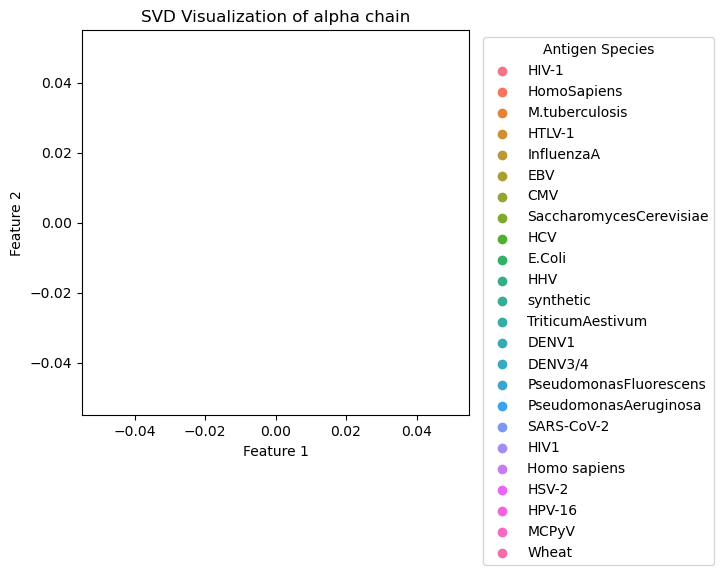

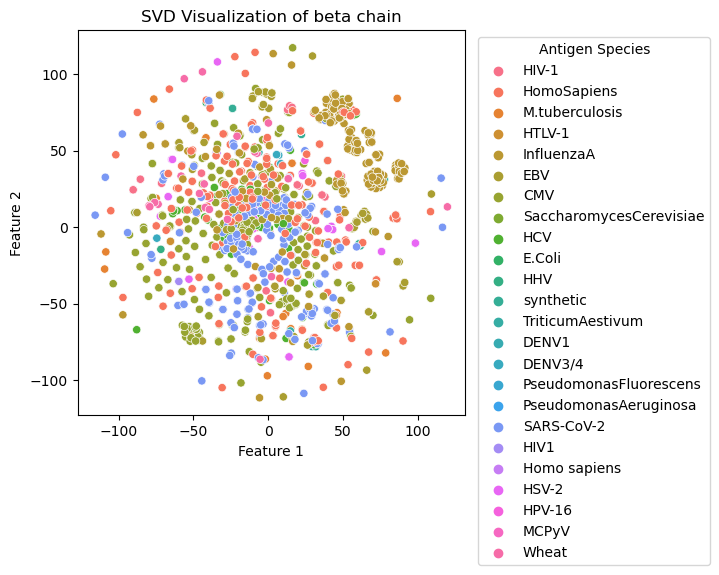

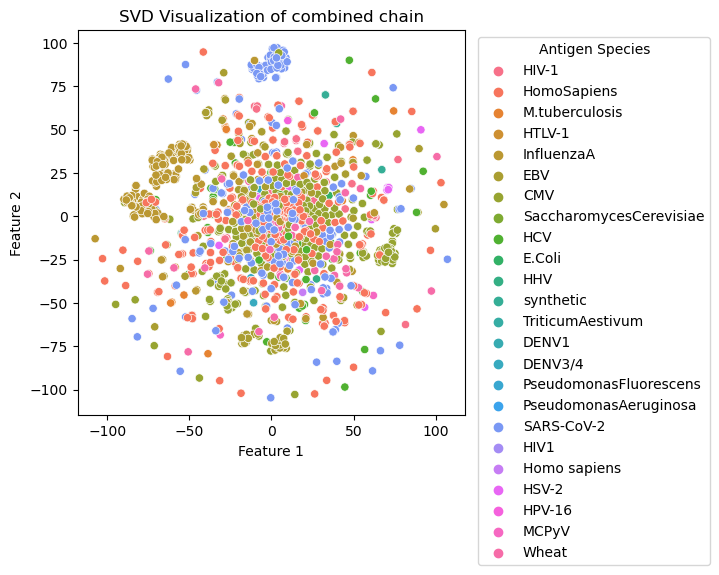

In [160]:
# SVD Visualization for alpha chain and beta chain
fig, ax0 = plt.subplots(figsize=(5, 5))
sns.scatterplot(A_tsne[:, 0], y=A_tsne[:, 1], hue=df_homo_alpha['antigen.species'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('SVD Visualization of alpha chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.65,1),title='Antigen Species')
plt.show

fig, ax0 = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=B_tsne[:, 0], y=B_tsne[:, 1], hue=df_homo_beta['antigen.species'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('SVD Visualization of beta chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.65,1),title='Antigen Species')
plt.show

fig, ax0 = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=C_tsne[:, 0], y=C_tsne[:, 1], hue=df_homo_combined['antigen.species'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('SVD Visualization of combined chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.65,1),title='Antigen Species')
plt.show

In [161]:
# fig, ax0 = plt.subplots(figsize=(15, 10))
# sns.scatterplot(x=combined_reduced[:, 0], y=combined_reduced[:, 1], hue=df_merge['antigen.species_x'], ax=ax0)
# ax0.set_xlabel('Feature 1')
# ax0.set_ylabel('Feature 2')
# ax0.set_title('SVD Visualization of combined chain')
# ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')
# plt.show

In [162]:
#since the data is in very high dimension, to boost the speed of process
#frist using TruncatedSVD to lower the dimension to 50
# svd = TruncatedSVD(n_components=50)
# alpha_reduced = svd.fit_transform(tr_a.rw_alpha)
# beta_reduced = svd.fit_transform(tr_b.rw_beta)
# combined_reduced = svd.fit_transform(combined_rw_distance)
# explained_variance_ratio = svd.explained_variance_ratio_
# explained_variance_ratio

In [163]:
# alpha_reduced

In [164]:
#using Tsne

# tsne = TSNE(n_components=2, random_state=42)
# A_tsne = tsne.fit_transform(alpha_reduced)
# B_tsne = tsne.fit_transform(beta_reduced)
# # using UMAP

# umap = UMAP(n_components=2, random_state=42)
# A_umap = umap.fit_transform(alpha_reduced)
# B_umap = umap.fit_transform(beta_reduced)

In [165]:
# Instantiated Tsne for combined chain
# C_tsne=tsne.fit_transform(combined_reduced)

In [166]:
# Instantiated Umap for combined chain
# C_umap=umap.fit_transform(combined_reduced)

In [167]:
# from sklearn.decomposition import PCA

# # 创建PCA对象，设置要降维的目标维度为2
# pca = PCA(n_components=2)

# # 对稀疏矩阵进行PCA降维
# A_pca = pca.fit_transform(homo_alpha_matrix)
# B_pca= pca.fit_transform(beta_reduced)

In [168]:
# fig, ax1 = plt.subplots()

# # PCA Visualization of alpha chain
# sns.scatterplot(x=A_pca[:, 0], y=A_pca[:, 1],hue=df_alpha['antigen.species'], ax=ax1)
# ax1.set_xlabel('Feature 1')
# ax1.set_ylabel('Feature 2')
# ax1.set_title('PCA Visualization of alpha chain')
# ax1.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

# plt.show()

# fig, ax2 = plt.subplots()

# # PCA Visualization of beta chain
# sns.scatterplot(x=B_pca[:, 0], y=B_pca[:, 1], hue=df_beta['antigen.species'], ax=ax2)
# ax2.set_xlabel('Feature 1')
# ax2.set_ylabel('Feature 2')
# ax2.set_title('PCA Visualization of beta chain')
# ax2.legend(loc='upper right',bbox_to_anchor=(1.25,1), title='Antigen Species')

# plt.show()

In [169]:
# A_pca.shape


In [170]:
# # t-SNE Visualization for alpha chain and beta chain
# fig, ax0 = plt.subplots()

# sns.scatterplot(x=A_tsne[:, 0], y=A_tsne[:, 1], hue=df_alpha['antigen.species'], ax=ax0)
# ax0.set_xlabel('Feature 1')
# ax0.set_ylabel('Feature 2')
# ax0.set_title('t-SNE Visualization of alpha chain')
# ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

# fig, ax1 = plt.subplots(figsize=(15, 10))
# sns.scatterplot(x=B_tsne[:, 0], y=B_tsne[:, 1], hue=df_beta['antigen.species'], ax=ax1)
# ax1.set_xlabel('Feature 1')
# ax1.set_ylabel('Feature 2')
# ax1.set_title('t-SNE Visualization of beta chain')
# ax1.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

# plt.show()

In [171]:
# # t-SNE Visualization for combined chain
# fig, ax0 = plt.subplots()

# sns.scatterplot(x=C_tsne[:, 0], y=C_tsne[:, 1], hue=df_merge['antigen.species_x'], ax=ax0)
# ax0.set_xlabel('Feature 1')
# ax0.set_ylabel('Feature 2')
# ax0.set_title('t-SNE Visualization of combined chain')
# ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

In [172]:
# # UMAP Visualization for alpha chain and beta chain
# fig, ax0 = plt.subplots()

# sns.scatterplot(x=A_umap[:, 0], y=A_umap[:, 1], hue=df_alpha['antigen.species'], ax=ax0)
# ax0.set_xlabel('Feature 1')
# ax0.set_ylabel('Feature 2')
# ax0.set_title('UMAP Visualization of alpha chain')
# ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

# fig, ax1 = plt.subplots(figsize=(15, 10))
# sns.scatterplot(x=B_umap[:, 0], y=B_umap[:, 1], hue=df_beta['antigen.species'], ax=ax1)
# ax1.set_xlabel('Feature 1')
# ax1.set_ylabel('Feature 2')
# ax1.set_title('UMAP Visualization of beta chain')
# ax1.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

# plt.show()

In [173]:
# # UMAP Visualization for combined chain
# fig, ax0 = plt.subplots(figsize=(10, 10))

# sns.scatterplot(x=C_umap[:, 0], y=C_umap[:, 1], hue=df_merge['antigen.species_x'], ax=ax0)
# ax0.set_xlabel('Feature 1')
# ax0.set_ylabel('Feature 2')
# ax0.set_title('UMAP Visualization of combined chain')
# ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

In [174]:
# from the comparison of the two pictures,clearly the TSNE method are more likely to shows more defined clusters
# based on our dataset specificity,so we choose TSNE to cluster seperation clearluy

In [175]:
def reduce_dimension_tsne(rw_alpha, rw_beta, combined_rw_distance):
    svd = TruncatedSVD(n_components=50) # use svd to reduce dimension to 50 can shorten the process time
    alpha_reduced = svd.fit_transform(rw_alpha)
    beta_reduced = svd.fit_transform(rw_beta)
    combined_reduced = svd.fit_transform(combined_rw_distance)
    tsne = TSNE(n_components=2, random_state=42) # use tsne to reduce dimension continuely can make the result more accurate
    A_tsne = tsne.fit_transform(alpha_reduced)
    B_tsne = tsne.fit_transform(beta_reduced)
    C_tsne = tsne.fit_transform(combined_reduced)
    return A_tsne,B_tsne,C_tsne

In [176]:
def reduce_dimension_umap(rw_alpha, rw_beta, combined_rw_distance):
    svd = TruncatedSVD(n_components=50) # use svd to reduce dimension to 50 can shorten the process time
    alpha_reduced = svd.fit_transform(rw_alpha)
    beta_reduced = svd.fit_transform(rw_beta)
    combined_reduced = svd.fit_transform(combined_rw_distance)
    umap = UMAP(n_components=2, random_state=42) # use tsne to reduce dimension continuely can make the result more accurate
    A_umap = umap.fit_transform(alpha_reduced)
    B_umap = umap.fit_transform(beta_reduced)
    C_umap = umap.fit_transform(combined_reduced)
    return A_umap,B_umap,C_umap

In [177]:
homo_alpha_tsne,homo_beta_tsne,homo_combined_tsne = reduce_dimension_tsne(homo_alpha_matrix,homo_beta_matrix,homo_combined_matrix)
mouse_alpha_tsne,mouse_beta_tsne,mouse_combined_tsne = reduce_dimension_tsne(mouse_alpha_matrix,mouse_beta_matrix,mouse_combined_matrix)
homo_alpha_umap,homo_beta_umap,homo_combined_umap = reduce_dimension_umap(homo_alpha_matrix,homo_beta_matrix,homo_combined_matrix)
mouse_alpha_umap,mouse_beta_umap,mouse_combined_umap = reduce_dimension_umap(mouse_alpha_matrix,mouse_beta_matrix,mouse_combined_matrix)

D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no

In [178]:
def plot_graph(data,df,chain):

        # Create a new figure and axis
        fig, ax = plt.subplots()
        # Plot t-SNE visualization
        sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=df['antigen.species'], ax=ax)

        # Set labels and title
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_title(f'Visualization of {chain}')

        # Set legend
        ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1), title='Antigen Species')

        # Show the plot
        plt.show()

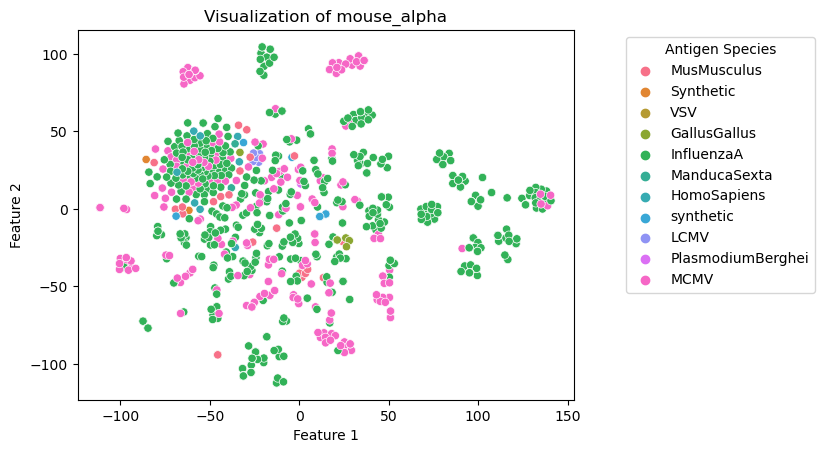

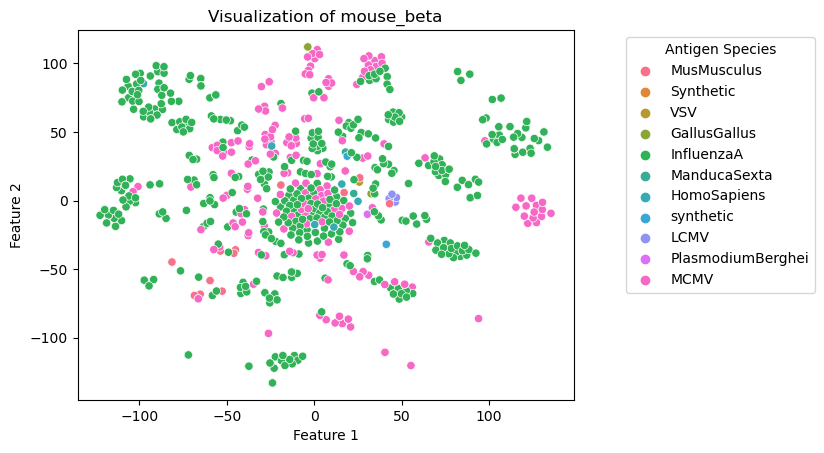

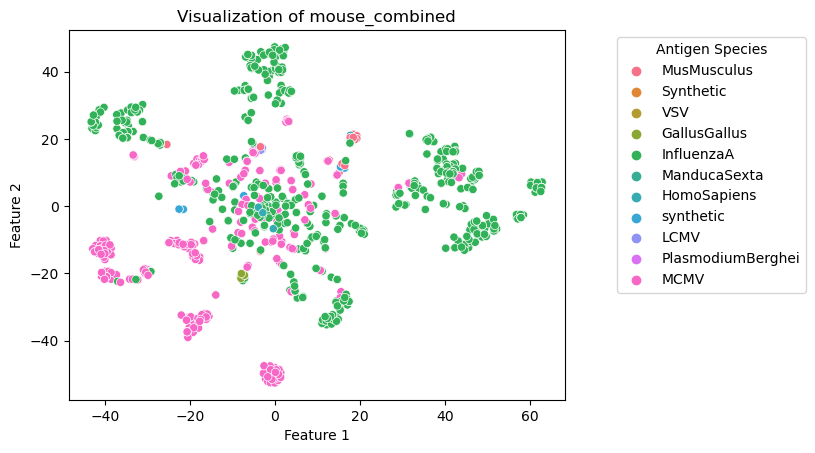

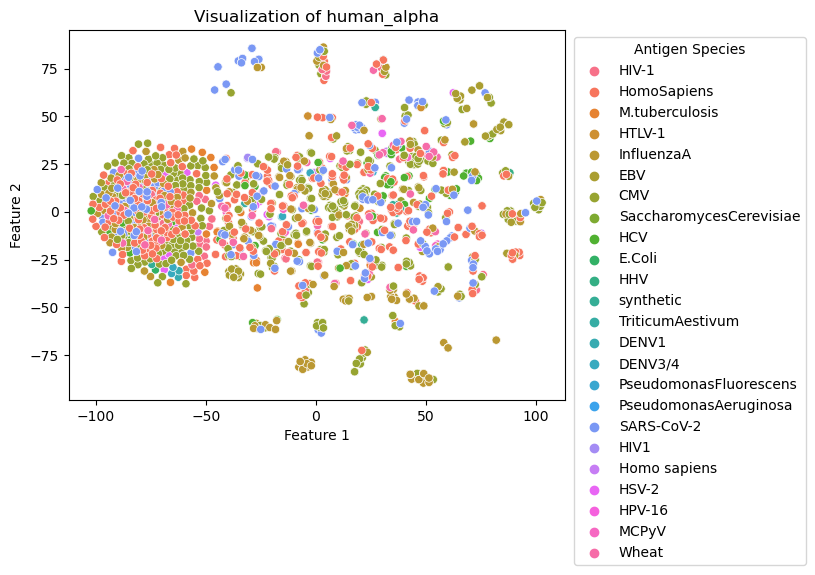

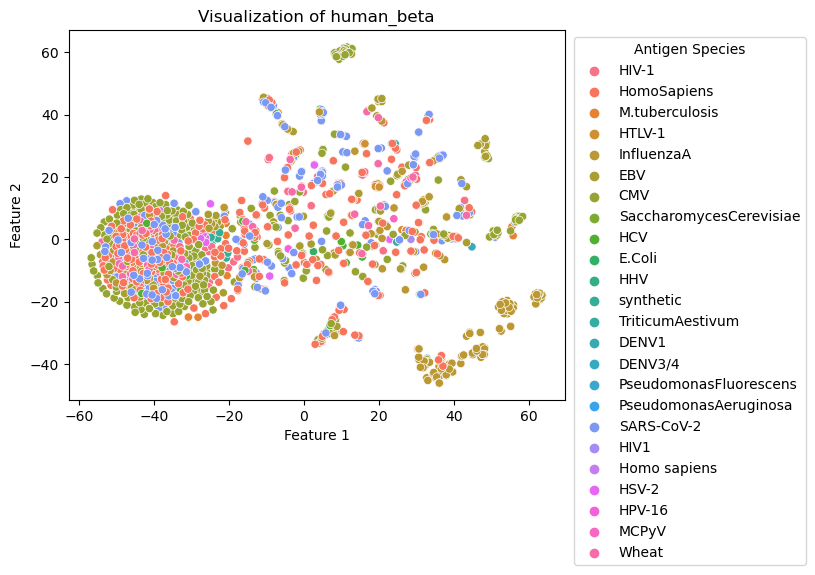

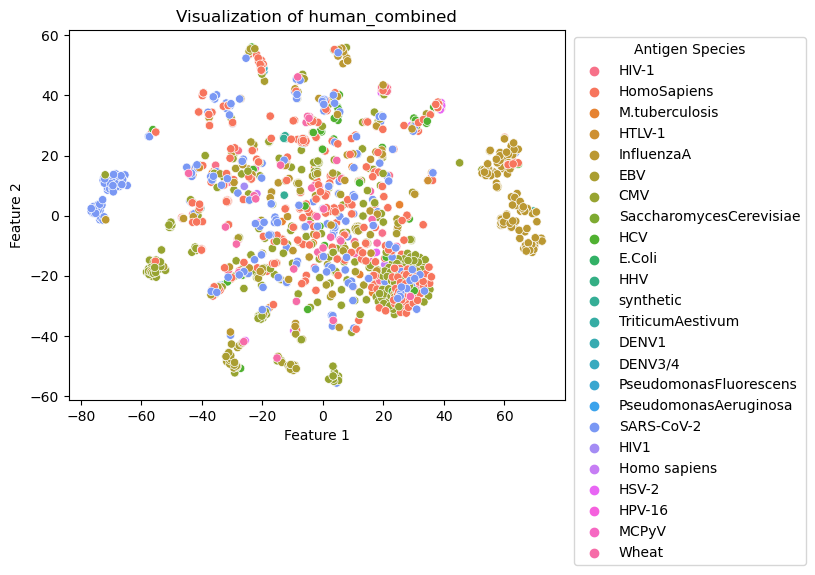

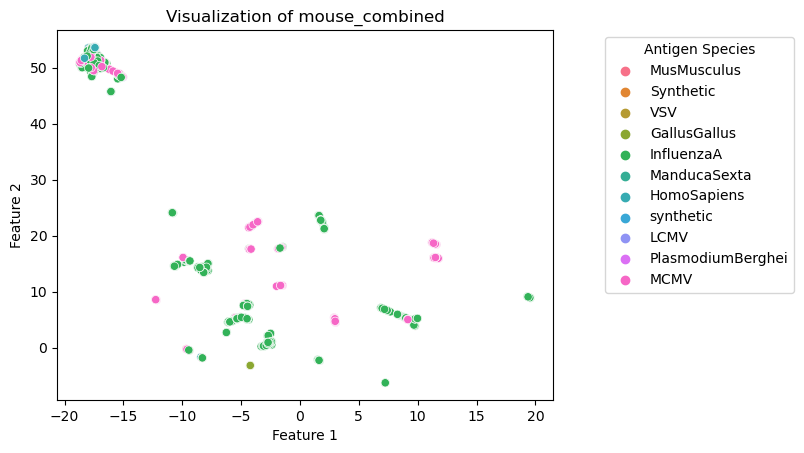

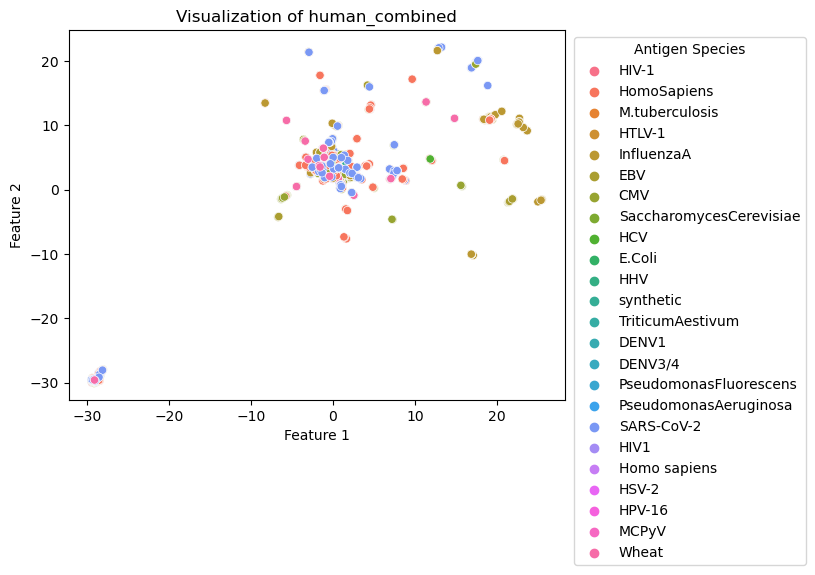

In [179]:
plot_graph(mouse_alpha_tsne,df_mouse_combined,'mouse_alpha')
plot_graph(mouse_beta_tsne,df_mouse_combined,'mouse_beta')
plot_graph(mouse_combined_tsne,df_mouse_combined,'mouse_combined')
plot_graph(homo_alpha_tsne,df_homo_combined,'human_alpha')
plot_graph(homo_beta_tsne,df_homo_combined,'human_beta')
plot_graph(homo_combined_tsne,df_homo_combined,'human_combined')
plot_graph(mouse_combined_umap,df_mouse_combined,'mouse_combined')
plot_graph(homo_combined_umap,df_homo_combined,'human_combined')

In [180]:
print(mouse_combined_tsne.shape)


(899, 2)


In [181]:
mouse_combined_tsne

array([[-25.429405 ,  18.371338 ],
       [ 15.453335 ,  11.683423 ],
       [ -1.5854152,  -0.7776388],
       ...,
       [ -3.877022 ,  -0.3248281],
       [ -0.3778883,  -6.694508 ],
       [ -2.8393056,  -1.9559773]], dtype=float32)

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
from tcrdist.repertoire import TCRrep
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split

In [183]:
def K_MEANS(mx, true_labels):
    kmeans = KMeans(n_clusters = 11)
    clusters = kmeans.fit_predict(mx)

    # Visualization
    plt.scatter(mx[:, 0], mx[:, 1], c = clusters, cmap='viridis', s = 10)
    plt.xlabel('SVD Component 1')
    plt.ylabel('SVD Component 2')
    plt.title('KMeans Clustering')
    plt.colorbar(label='Cluster')
    plt.show()

    # 计算连接矩阵
    Z = linkage(mx, 'average')
    # 绘制分类的树状图
    plt.figure(figsize=(10, 5))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # 旋转叶子节点标签的角度
        leaf_font_size=8.,  # 叶子节点标签字体大小
    )
    plt.show()

    # print(clusters)
    metrics = cluster_metrics(true_labels, clusters)
    for i, (match_rate, purity) in enumerate(metrics):
        print(f"Cluster {i} - Match Rate: {match_rate}, Purity: {purity}")

    # Silhouette Score(轮廓系数): Higher Silhouette Score indicates better quality of clustering results(越高越好), Values in the range [-1, 1].
    print("Silhouette Score:", silhouette_score(mx, clusters))

    # Calinski-Harabasz index: Higher Calinski-Harabasz index indicates better quality of clustering results(越高越好)
    print("Calinski-Harabasz Index:", calinski_harabasz_score(mx, clusters))
    
    print(clusters)

In [184]:
def AHC(mx):
    n_clusters = 12  # number of clusters
    agglomerative_clustering = AgglomerativeClustering(n_clusters = n_clusters, linkage='average')
    clusters = agglomerative_clustering.fit_predict(mx)

    # Visualization
    plt.scatter(mx[:, 0], mx[:, 1], c=clusters, cmap='viridis', s=10)
    plt.xlabel('SVD Component 1')
    plt.ylabel('SVD Component 2')
    plt.title('Agglomerative Hierarchical Clustering')
    plt.colorbar(label='Cluster')
    plt.show()

    # 计算连接矩阵
    Z = linkage(mx, 'average')
    # 绘制分类的树状图
    plt.figure(figsize=(10, 5))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # 旋转叶子节点标签的角度
        leaf_font_size=8.,  # 叶子节点标签字体大小
    )
    plt.show()

    # Silhouette Score(轮廓系数): Higher Silhouette Score indicates better quality of clustering results(越高越好), Values in the range [-1, 1].
    silhouette_avg = silhouette_score(mx, clusters)
    # Calinski-Harabasz index: Higher Calinski-Harabasz index indicates better quality of clustering results(越高越好)
    calinski_harabasz_avg = calinski_harabasz_score(mx, clusters)
    return silhouette_avg, calinski_harabasz_avg

In [185]:
#     # Silhouette Score(轮廓系数): Higher Silhouette Score indicates better quality of clustering results(越高越好), Values in the range [-1, 1].
#     silhouette_avg = []

#     # Calinski-Harabasz index: Higher Calinski-Harabasz index indicates better quality of clustering results(越高越好)
#     calinski_harabasz_avg = []
    
#     true_labels = df_mouse_combined['antigen.species']
#     # K-Means Clustering
#     true_labels
#     K_MEANS(mouse_combined_tsne, true_labels)

In [186]:
# pip install tensorflow

In [187]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def SVD(X_train, y_train):
    # 创建并训练模型
    model = SVC()
    model.fit(X_train, y_train)

    # 预测和评估
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # 'macro' 未加权平均; 'micro' 给出总体 TP, FN 和 FP 的比例
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print('result of SVD')
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    # Accuracy:  0.8
    # Precision:  0.24405348346235045
    # Recall:  0.22927748491281635
    # F1 Score:  0.2300664451827243
    return model

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def RF(X_train,y_train):
    # 创建随机森林分类器实例
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators是树的数量

    # 训练模型
    model.fit(X_train, y_train)
    # 进行预测
    y_pred = model.predict(X_test)

    # 计算并打印性能指标
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print('result of RF')
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)

    importances = model.feature_importances_
    print("Feature importances:", importances)
    # Accuracy:  0.8888888888888888
    # Precision:  0.6717721806217382
    # Recall:  0.7527729408677813
    # F1 Score:  0.7049485280837999
    return model

In [189]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
# 定义5折交叉验证
def Kfold(X,y,model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=3)


    # 使用cross_val_score来评估模型，这里使用准确率作为评分标准
    accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    # 打印每次交叉验证的结果和平均准确率
    print("每次交叉验证的准确率:", accuracy_scores)
    print("平均交叉验证准确率:", accuracy_scores.mean())

    # 进行交叉验证并评估多个指标
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    results = cross_validate(model, X, y, cv=kf, scoring=scoring)

    # 打印平均结果
    print("Mean accuracy:", results['test_accuracy'].mean())
    print("Mean precision:", results['test_precision_macro'].mean())
    print("Mean recall:", results['test_recall_macro'].mean())
    print("Mean F1 score:", results['test_f1_macro'].mean())

In [190]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def GBM(X_train, y_train):
    # 创建梯度提升分类器实例
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # 训练模型
    model.fit(X_train, y_train)

    # 进行预测
    y_pred = model.predict(X_test)

    # 计算并打印性能指标
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print('result of GBM')
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    # Accuracy:  0.8166666666666667
    # Precision:  0.58242343397536
    # Recall:  0.6078905075972616
    # F1 Score:  0.5873833025381698
    return model

In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def KNN(X_train, y_train):
    # 创建KNN分类器实例
    # n_neighbors为K值，可以调整以优化模型性能
    model = KNeighborsClassifier(n_neighbors=3)

    # 训练模型（KNN是基于实例的学习，这里“训练”只是加载数据）
    model.fit(X_train, y_train)

    # 进行预测
    y_pred = model.predict(X_test)

    # 计算并打印性能指标
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print('result of KNN')
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)

    # Accuracy:  0.8611111111111112
    # Precision:  0.5704466258711541
    # Recall:  0.6204969527467024
    # F1 Score:  0.5866829514824798
    return model

In [192]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

In [193]:
def TK_Encoding(data):
    # 初始化一个预训练的BERT模型分词器
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
    
    # 使用分词器的__call__方法来编码文本
    # 确保data是一个字符串列表
    encoded_inputs = tokenizer(data, padding=True, truncation=True, return_tensors="pt")

In [194]:
def WE_Encoding(data):
    # 假设data已经是整数编码并且填充完成的序列
    # 计算input_dim，应该为整数编码中的最大值加1
    input_dim = np.max(data) + 1  # data是所有整数编码填充后的序列
    embedding_dim = 2

    # 创建嵌入层
    embedding_layer = tf.keras.layers.Embedding(input_dim=input_dim, output_dim=embedding_dim)

    # 你可以通过嵌入层处理数据来获得嵌入表示
    # 嵌入层需要在模型训练过程中使用，这里只是创建它
    # 假设data形状为(samples, sequence_length)
    # 输出将是(samples, sequence_length, embedding_dim)

In [195]:
def Transformer(data):
    data = data.astype(str)
    chars = set(''.join(data.dropna()))
    char_to_idx = {char: idx for idx, char in enumerate(chars)}
    max_seq_length = max(len(seq) for seq in data)
    dataset = Standard_Dataset(data, char_to_idx, max_seq_length)
    dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

    class Transformer_Model(nn.Module):
        def __init__(self, input_size, d_model, nhead, numlayers, dim_feedforward, dropout = 0.1):
            super(Transformer_Model, self).__init__()
            self.embedding = nn.Embedding(input_size, d_model)
            self.transformer = nn.Transformer(d_model = d_model, nhead = nhead, num_encoder_layers = numlayers, num_decoder_layers = numlayers, dim_feedforward = dim_feedforward, dropout = dropout)
            self.fc_ou = nn.Linear(d_model, input_size)
        def forward(self, src):
            src = self.embedding(src)
            output = self.transformer(src, src)
            output = self.fc_ou(output)
            return output

    model = Transformer_Model(len(chars), d_model = 512, nhead = 8, numlayers = 6, dim_feedforward = 2048)
    optimizer = optim.Adam(model.parameters(), lr = 0.001)
    criterion = nn.CrossEntropyLoss()

    model.train()
    for batch in dataloader:
        optimizer.zero_grad()
        output = model(batch)
        loss = criterion(output.view(-1, output.shape[-1]), batch.view(-1))
        loss.backward()
        optimizer.step()
        print(f'LOSS: {loss.item(): .4f}')
    print("Finished")

In [196]:
df_homo

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,antigen.epitope,antigen.gene,antigen.species
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,FLKEKGGL,Nef,HIV-1
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,FLKEKGGL,Nef,HIV-1
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,FLKEKGGL,Nef,HIV-1
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,FLKEKGGL,Nef,HIV-1
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,FLKEKGGL,Nef,HIV-1
...,...,...,...,...,...,...,...,...,...,...,...
92686,30552,TRB,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,FPQPEQPFPWQP,Gluten,Wheat
92689,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,QLQPFPQPELPY,Gluten,Wheat
92690,30554,TRB,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,QLQPFPQPELPY,Gluten,Wheat
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,PQQPFPQPEQPFP,Gluten,Wheat


In [197]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding, LSTM, Dense
# 假设 mouse_combined_tsne 是你的特征矩阵，true_labels 是对应的标签数组

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 假设 df 是包含了序列及其他特征的 DataFrame
# sequence = pd.concat([df_homo_combined['cdr3_a_aa'], df_homo_combined['cdr3_b_aa']])
sequence = df_homo['cdr3']
sequences = sequence.values
# v_gene = pd.concat([df_homo_combined['v_a_gene'], df_homo_combined['v_b_gene']])
v_gene = df_homo['v.segm']
v_genes = v_gene.values
# j_gene = pd.concat([df_homo_combined['j_a_gene'],df_homo_combined['j_b_gene']])
j_gene = df_homo['j.segm']
j_genes = j_gene.values
mhc_a = df_homo['mhc.a']
mhc_aa = mhc_a.values
mhc_b = df_homo['mhc.b']
mhc_bb = mhc_b.values

# 对 V_gene 和 J_gene 进行整数编码
label_encoder_v = LabelEncoder()
integer_encoded_v_genes = label_encoder_v.fit_transform(v_genes)

label_encoder_j = LabelEncoder()
integer_encoded_j_genes = label_encoder_j.fit_transform(j_genes)

label_encoder_a = LabelEncoder()
integer_encoded_mhc_a = label_encoder_v.fit_transform(mhc_aa)

label_encoder_b = LabelEncoder()
integer_encoded_mhc_b = label_encoder_j.fit_transform(mhc_bb)
# # 或者使用独热编码
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded_v_genes = integer_encoded_v_genes.reshape(len(integer_encoded_v_genes), 1)
# onehot_encoded_v_genes = onehot_encoder.fit_transform(integer_encoded_v_genes)

# integer_encoded_j_genes = integer_encoded_j_genes.reshape(len(integer_encoded_j_genes), 1)
# onehot_encoded_j_genes = onehot_encoder.fit_transform(integer_encoded_j_genes)

# 生成 k-mer 特征矩阵
from collections import Counter
import itertools

# 确定 k-mer 的大小
k = 4

# 生成 k-mer 列表
def generate_kmers(sequence, k):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

# 生成所有序列的 k-mers
all_kmers = [generate_kmers(seq, k) for seq in sequences]

# 构建 k-mer 计数
kmers_counts = [Counter(kmers) for kmers in all_kmers]

# 生成 k-mer 字典，用于将 k-mer 映射到特征索引
all_possible_kmers = [''.join(kmer) for kmer in itertools.product('ACGT', repeat=k)]
kmer_index = {kmer: i for i, kmer in enumerate(all_possible_kmers)}

# 创建特征矩阵
feature_matrix = []
for kmer_count in kmers_counts:
    feature_vector = [kmer_count.get(kmer, 0) for kmer in all_possible_kmers]
    feature_matrix.append(feature_vector)

# 将特征矩阵转换为 NumPy 数组
import numpy as np
feature_matrix = np.array(feature_matrix)
print(feature_matrix.shape)
# 现在 feature_matrix 可用于机器学习模型的训练

# 创建一个带有额外特征的新特征矩阵
# 如果使用整数编码:
additional_features = np.vstack((integer_encoded_v_genes, integer_encoded_j_genes,integer_encoded_mhc_a,integer_encoded_mhc_b)).T

# 如果使用独热编码:
# additional_features = np.hstack((onehot_encoded_v_genes, onehot_encoded_j_genes))

# 将 k-mer 特征矩阵与其他特征合并
full_feature_matrix = np.hstack((feature_matrix, additional_features))
print(full_feature_matrix.shape)
# 这个 full_feature_matrix 现在已经包含了序列的 k-mer 特征和 V_gene, J_gene 的特征


(3802, 256)
(3802, 260)


In [199]:
X = full_feature_matrix
# y = pd.concat([df_homo_combined['epitope_x'],df_homo_combined['epitope_y']])  # 确保你有相应的标签
y = df_homo['antigen.epitope']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
SVD_model=SVD(X_train,y_train)
RF_model=RF(X_train,y_train)
Kfold(X_train,y_train,RF_model)
# GBM_model=GBM(X_train,y_train)
KNN_model=KNN(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


result of SVD
Accuracy:  0.35348226018396844
Precision:  0.02123178825193543
Recall:  0.047865328060034476
F1 Score:  0.025993116279946247


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


result of RF
Accuracy:  0.5873850197109067
Precision:  0.19171876534275295
Recall:  0.21440681092751457
F1 Score:  0.1915518388053941
Feature importances: [1.62662517e-04 0.00000000e+00 6.44644574e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.14112500e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.84393934e-03 6.08213823e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.57632965e-04 0.00000000e+00 7.39390695e-03 3.70908599e-03
 3.00471603e-03 0.00000000e+00 1.27004561e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.0000

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in 

Mean accuracy: 0.536341392273788
Mean precision: 0.1650255419665779
Mean recall: 0.18029317808806788
Mean F1 score: 0.16462167234128133
result of KNN
Accuracy:  0.4940867279894875
Precision:  0.1385362970570583
Recall:  0.15848290837554796
F1 Score:  0.13636277485007228


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3074 - loss: 4.0858 - val_accuracy: 0.0434 - val_loss: 8.2254
Epoch 2/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.3835 - loss: 2.8325 - val_accuracy: 0.0434 - val_loss: 9.8098
Epoch 3/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.4271 - loss: 2.5837 - val_accuracy: 0.0434 - val_loss: 10.3022
Epoch 4/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.4280 - loss: 2.4702 - val_accuracy: 0.0407 - val_loss: 10.6722
Epoch 5/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.4398 - loss: 2.3993 - val_accuracy: 0.0460 - val_loss: 12.5205
Epoch 6/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.4431 - loss: 2.3172 - val_accuracy: 0.0460 - val_loss: 12.7558
Epoch 7/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.4479 - loss: 2.2814 - val_accuracy: 0.0578 - val_loss: 13.5451
Epoch 8/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.4490 - loss: 2.2675 - val_accu

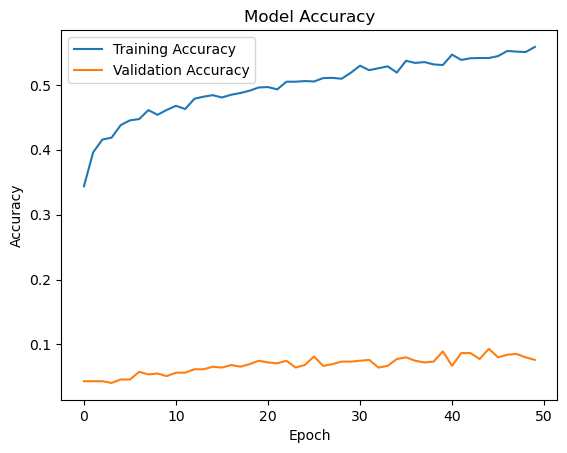

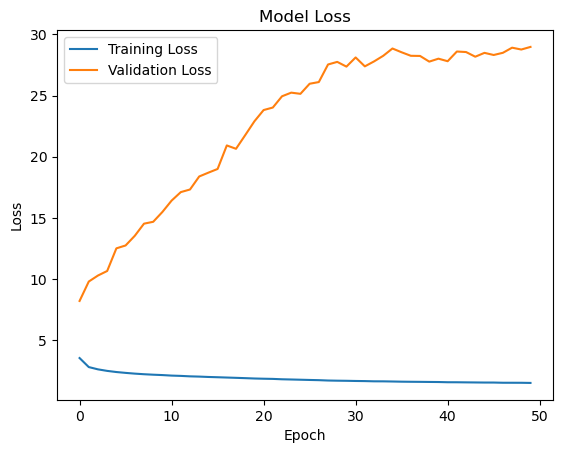

In [207]:
# def pad_seq(sequence):
#     # 创建一个简单的映射字典 Create a simple mapping dictionary
#     chars = sorted(set(''.join(sequence)))
#     char_to_index = {ch: i + 1 for i, ch in enumerate(chars)}  # +1 以保留0用于填充 to retain 0 for padding

#     # 将字符序列转换为整数序列 Convert a sequence of characters to a sequence of integers
#     int_sequences = [[char_to_index[ch] for ch in seq] for seq in sequence]

#     # 使用pad_sequences填充整数序列 Filling integer sequences with pad_sequences
#     padded_sequences = pad_sequences(int_sequences, padding='post', maxlen=18)

#     return padded_sequences

# padded_sequences = pad_seq(sequence)
# WE_Encoding(padded_sequences)

# labels= pd.concat([df_homo_combined['epitope_x'],df_homo_combined['epitope_y']])
# labels=df_homo_combined['epitope_x']
labels = df_homo['antigen.epitope']

# 创建 LabelEncoder 实例
label_encoder = LabelEncoder()

# 转换文本标签为整数 Convert text labels to integers
integer_encoded_labels = label_encoder.fit_transform(labels)

# 将整数标签转换为独热编码 Converting integer labels to one hot encoding
one_hot_encoded_labels = to_categorical(integer_encoded_labels, num_classes=322)
print(one_hot_encoded_labels)

# model = Sequential([
#     Embedding(input_dim=np.max(padded_sequences) + 1, output_dim=2, input_length=18),
#     SimpleRNN(32, return_sequences=False),
# #     SimpleRNN(32),  
#     Dense(24, activation='softmax')  # 输出层与标签类别数匹配
# ])

model = Sequential([
    Dense(32, activation='relu', input_shape=(260,)),  # 输入层，输入维度为2
    Dense(322, activation='softmax')  # 输出层，类别数为24
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.fit(full_feature_matrix, one_hot_encoded_labels, epochs=30, batch_size=32, validation_split=0.2)
# 绘制学习曲线
history = model.fit(
    X,
    one_hot_encoded_labels,
    epochs=50,
    batch_size=4,
    validation_split=0.2  # 使用20%的数据作为验证集
)
# 绘制训练和验证的准确率
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 绘制训练和验证的损失
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



In [204]:
print(labels.nunique())

322


In [208]:
from tensorflow.keras.callbacks import EarlyStopping

# 设置早停回调函数
early_stopping = EarlyStopping(
    monitor='val_loss',  # 监控模型的验证损失
    patience=10,         # 如果验证损失在10个epoch内没有改进，中断训练
    verbose=1,           # 打印早停的消息
    mode='min',          # 监控损失时，我们希望损失最小化
    restore_best_weights=True  # 恢复在验证集上表现最好的权重
)

# 将早停回调函数加入模型训练中
history = model.fit(
    X,
    one_hot_encoded_labels,
    epochs=100, 
    batch_size=4, 
    validation_split=0.2,
    callbacks=[early_stopping]  # 添加回调函数列表
)

Epoch 1/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.5547 - loss: 1.5347 - val_accuracy: 0.0788 - val_loss: 28.7175
Epoch 2/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.5810 - loss: 1.4815 - val_accuracy: 0.0920 - val_loss: 28.9683
Epoch 3/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.5535 - loss: 1.4775 - val_accuracy: 0.0920 - val_loss: 29.2386
Epoch 4/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.5654 - loss: 1.4823 - val_accuracy: 0.0841 - val_loss: 28.3164
Epoch 5/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.5572 - loss: 1.4638 - val_accuracy: 0.0696 - val_loss: 29.5859
Epoch 6/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.5720 - loss: 1.4509 - val_accuracy: 0.0815 - val_loss: 30.0407
Epoch 7/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.5632 - loss: 1.5119 - val_accuracy: 0.0802 - val_loss: 29.3927
Epoch 8/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.5685 - 